#**Remove Duplication**
**Identify and remove duplicate values in a
 dataset.**


Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Path variable for dataset

In [2]:
data = pd.read_csv('/content/Iris.csv')

Data Details

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.shape

(150, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Check null values in the dataset.

In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Searching for errors

The iris flower sepal length and width should not be <= 0 and should not be > 10

The iris flower petal length and width should not be <= 0 and should not be > 10

We should have only 3 spieces in the classes.

In [8]:
df = data.copy()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
classes = df['Species'].unique()
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Checking for duplicated

In [10]:
duplicates = df.duplicated(keep=False)
print("Duplicate rows:")
print(df[duplicates])

Duplicate rows:
Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


In [11]:
df_cleaned = df.drop_duplicates(keep='first')
duplicates = df_cleaned.duplicated(keep=False)
df = df_cleaned
print("After cleaning, Duplicate rows:")
print(df[duplicates])

After cleaning, Duplicate rows:
Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


Checking for outliers.

In [12]:
print("Outliers detected using Z-scores:")
sepal_length_data = df['SepalLengthCm']
z_scores_sepal_length = (sepal_length_data - np.mean(sepal_length_data)) / np.std(sepal_length_data)
threshold = 2.5
outliers_z_score_sepal_length = sepal_length_data[np.abs(z_scores_sepal_length) > threshold]
print("sepal_length:")
print(outliers_z_score_sepal_length)

sepal_width_data = df['SepalWidthCm']
z_scores_sepal_width = (sepal_width_data - np.mean(sepal_width_data)) / np.std(sepal_width_data)
threshold = 2.5
outliers_z_score_sepal_width = sepal_width_data[np.abs(z_scores_sepal_width) > threshold]
print("sepal_width :")
print(outliers_z_score_sepal_width)

petal_length_data = df['PetalLengthCm']
z_scores_petal_length = (petal_length_data - np.mean(petal_length_data)) / np.std(petal_length_data)
threshold = 2.5
outliers_z_score_sepal_width = petal_length_data[np.abs(z_scores_petal_length) > threshold]
print("petal_length :")
print(outliers_z_score_sepal_width)

petal_width_data = df['PetalWidthCm']
z_scores_petal_width = (petal_width_data - np.mean(petal_width_data)) / np.std(petal_width_data)
threshold = 2.5
outliers_z_score_sepal_width = petal_width_data[np.abs(z_scores_petal_width) > threshold]
print("petal_width :")
print(outliers_z_score_sepal_width)

Outliers detected using Z-scores:
sepal_length:
Series([], Name: SepalLengthCm, dtype: float64)
sepal_width :
15    4.4
33    4.2
Name: SepalWidthCm, dtype: float64
petal_length :
Series([], Name: PetalLengthCm, dtype: float64)
petal_width :
Series([], Name: PetalWidthCm, dtype: float64)


In [13]:
print("Outliers detected using robust z-scores:")
data = df['SepalLengthCm']
robust_median = data.median()
mad = ((data - robust_median).abs()).median()
robust_z_scores_sepal_length = (0.6745 * (data - robust_median)) / mad
threshold = 2.5
outliers = data[robust_z_scores_sepal_length.abs() > threshold]
print("sepal_length :")
print(outliers)

data = df['SepalWidthCm']
robust_median = data.median()
mad = ((data - robust_median).abs()).median()
robust_z_scores_sepal_width = (0.6745 * (data - robust_median)) / mad
threshold = 2.5
outliers = data[robust_z_scores_sepal_width.abs() > threshold]
print("sepal_width :")
print(outliers)

Outliers detected using robust z-scores:
sepal_length :
Series([], Name: SepalLengthCm, dtype: float64)
sepal_width :
14    4.0
15    4.4
32    4.1
33    4.2
60    2.0
Name: SepalWidthCm, dtype: float64


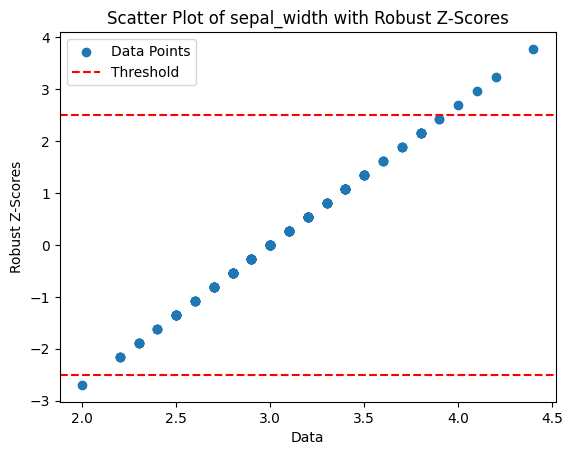

In [14]:
threshold = 2.5
plt.scatter(data, robust_z_scores_sepal_width, label='Data Points')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.axhline(y=-threshold, color='red', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Robust Z-Scores')
plt.title('Scatter Plot of sepal_width with Robust Z-Scores')
plt.legend()
plt.show()

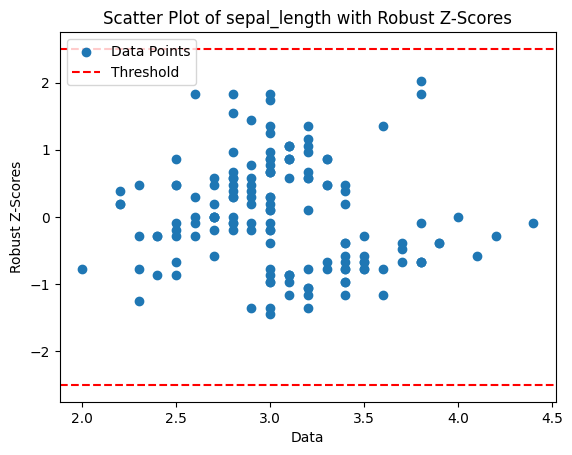

In [15]:
threshold = 2.5
plt.scatter(data, robust_z_scores_sepal_length, label='Data Points')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.axhline(y=-threshold, color='red', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Robust Z-Scores')
plt.title('Scatter Plot of sepal_length with Robust Z-Scores')
plt.legend()
plt.show()

I am going to convert such anomalies to the maximum value.

In [16]:
print("Before")
print(df.iloc[15])
print(df.iloc[33])

drops = [15, 33]
temp_df = df.drop(drops)
max_sepal_width = temp_df['SepalWidthCm'].max()
df.loc[15, 'sepal_width'] = max_sepal_width
df.loc[33, 'sepal_width'] = max_sepal_width

print("After")
print(df.iloc[15])
print(df.iloc[33])

Before
Id                        16
SepalLengthCm            5.7
SepalWidthCm             4.4
PetalLengthCm            1.5
PetalWidthCm             0.4
Species          Iris-setosa
Name: 15, dtype: object
Id                        34
SepalLengthCm            5.5
SepalWidthCm             4.2
PetalLengthCm            1.4
PetalWidthCm             0.2
Species          Iris-setosa
Name: 33, dtype: object
After
Id                        16
SepalLengthCm            5.7
SepalWidthCm             4.4
PetalLengthCm            1.5
PetalWidthCm             0.4
Species          Iris-setosa
sepal_width              4.1
Name: 15, dtype: object
Id                        34
SepalLengthCm            5.5
SepalWidthCm             4.2
PetalLengthCm            1.4
PetalWidthCm             0.2
Species          Iris-setosa
sepal_width              4.1
Name: 33, dtype: object
